In [1]:
import os 
import scipy.io 
import matplotlib.pyplot as plt 
import numpy as np
import sys 
sys.path.append("../")

import scienceplots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
from utils import relative_err
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from matplotlib.text import Text

from utils import load_cos3d_kernel_dataset, load_log3d_kernel_dataset, load_logcos3d_kernel_dataset

In [2]:
data_root = '../data'
mesh_path = os.path.join(data_root, 'mesh3D_box_17.mat')
ys = scipy.io.loadmat(mesh_path)['X']
xs = scipy.io.loadmat(mesh_path)['X']

from utils import load_log3d_kernel_dataset
fTrain, fTest, uTrain, uTest, X, Gref = load_log3d_kernel_dataset(
    data_root='../data', nTrain=3000, nTest=1000)

estimate log(r) kernel


In [3]:
def vis_3D_result(task, idx, outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,3).flatten()
    ax1 = subfigs[0].add_subplot(projection='3d')
    ax2 = subfigs[1].add_subplot(projection='3d')
    ax3 = subfigs[2].add_subplot(projection='3d')

    if task == 'log3D':
        from utils import load_log3d_kernel_dataset
        fTrain, fTest, uTrain, uTest, X, Gref = load_log3d_kernel_dataset(
            data_root='../data', nTrain=3000, nTest=1000)
        upred = np.load(
            "../results/log3D/ogapw-513-3000-relu/upred.npy", allow_pickle=True)
        Gpred = np.load(
            "../results/log3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)
    elif task == 'logsin3D':
        from utils import load_logsin3d_kernel_dataset
        fTrain, fTest, uTrain, uTest, X, Gref = load_logsin3d_kernel_dataset(
            data_root='../data', nTrain=3000, nTest=1000)
        upred = np.load(
            "../results/logsin3D/ogapw-513-3000-relu/upred.npy", allow_pickle=True) 
        Gpred = np.load(
            "../results/logsin3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)
    elif task == 'logcos3D':
        from utils import load_logcos3d_kernel_dataset
        fTrain, fTest, uTrain, uTest, X, Gref = load_logcos3d_kernel_dataset(
            data_root='../data', nTrain=3000, nTest=1000)
        upred = np.load(
            "../results/logcos3D/ogapw-513-3000-relu/upred.npy", allow_pickle=True) 
        Gpred = np.load(
            "../results/logcos3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)
    elif task == 'cos3D':
        from utils import load_cos3d_kernel_dataset
        fTrain, fTest, uTrain, uTest, X, Gref = load_cos3d_kernel_dataset(
            data_root='../data', nTrain=3000, nTest=1000)
        upred = np.load(
            "../results/cos3D/ogapw-513-3000-relu/upred.npy", allow_pickle=True) 
        Gpred = np.load(
            "../results/cos3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)
    
    # h = 1/fTest.shape[0]
    # upred = h * (Gpred @ fTest).T
    url2 = relative_err(upred, uTest)
    print(f"task : {task}")
    print("u relative L2 : {:.4e}".format(url2))

    Grl2 = relative_err(Gpred, Gref)
    print(f"task : {task}")
    print("G relative L2 : {:.4e}".format(Grl2))

    upred = upred[:,idx].reshape(17,17,17)
    uref = uTest[:,idx].reshape(17,17,17)
    uerr = np.abs(upred - uref)
    vmin = uref.min()
    vmax = uref.max()

    kw = {
        'cmap': 'jet',
        'vmin': uref.min(),
        'vmax': uref.max(),
        'levels': np.linspace(uref.min(), uref.max(), 20)}
    
    kwerr = {
        'cmap': 'jet',
        'vmin': uerr.min(),
        'vmax': uerr.max(),
        'levels': np.linspace(uerr.min(), uerr.max(), 20)}

    X, Y, Z = np.meshgrid(
        np.arange(17), np.arange(17), -np.arange(17))
    # Plot contour surfaces
    _ = ax1.contourf(
        X[:, :, 0], Y[:, :, 0], uref[:, :, 0],
        zdir='z', offset=0, **kw)
    _ = ax1.contourf(
        X[0, :, :], uref[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kw)
    c1 = ax1.contourf(
        uref[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kw)
    
    _ = ax2.contourf(
        X[:, :, 0], Y[:, :, 0], upred[:, :, 0],
        zdir='z', offset=0, **kw)
    _ = ax2.contourf(
        X[0, :, :], upred[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kw)
    c2 = ax2.contourf(
        upred[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kw)
    
    _ = ax3.contourf(
        X[:, :, 0], Y[:, :, 0], uerr[:, :, 0],
        zdir='z', offset=0, **kwerr)
    _ = ax3.contourf(
        X[0, :, :], uerr[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kwerr)
    c3 = ax3.contourf(
        uerr[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kwerr)
    
    xmin, xmax = X.min(), X.max()
    ymin, ymax = Y.min(), Y.max()
    zmin, zmax = Z.min(), Z.max()    
    edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
    ax1.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
    ax2.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
    ax3.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    ax1.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    ax1.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    ax1.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
    ax2.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    ax2.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    ax2.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

    ax3.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    ax3.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    ax3.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

    # Set labels and zticks
    ax1.set_xticklabels("")
    ax1.set_yticklabels("")
    ax1.set_zticklabels("")
    ax1.set(
        title="Reference",)
    
    cbar = f.colorbar(c1, ax=ax1, fraction=0.02, pad=0.1)
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_a = Text(0.01, 0.8, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)

    ax2.set_xticklabels("")
    ax2.set_yticklabels("")
    ax2.set_zticklabels("")
    ax2.set(
        title="Prediction",)

    cbar = f.colorbar(c2, ax=ax2, fraction=0.02, pad=0.1)
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_b = Text(0.01, 0.8, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)

    ax3.set_xticklabels("")
    ax3.set_yticklabels("")
    ax3.set_zticklabels("")
    ax3.set(
        title="Absolute Error",
    )

    cbar = f.colorbar(c3, ax=ax3, fraction=0.02, pad=0.1)
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_c = Text(0.01, 0.8, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
    subfigs[2].add_artist(label_c)


    # ax1.set(
    #     xlabel='$x_1$',
    #     ylabel='$x_2$',
    #     zlabel='$x_3$',
    #     xticks=[],
    #     yticks=[],
    #     zticks=[],)
    # ax2.set(
    #     xlabel='$x_1$',
    #     ylabel='$x_2$',
    #     zlabel='$x_3$',
    #     xticks=[],
    #     yticks=[],
    #     zticks=[],)
    # ax3.set(
    #     xlabel='$x_1$',
    #     ylabel='$x_2$',
    #     zlabel='$x_3$',
    #     xticks=[],
    #     yticks=[],
    #     zticks=[],)
    

    # Set zoom and angle view
    ax1.view_init(40, -30, 0)
    ax1.set_box_aspect((1,1,1), zoom=0.9)
    ax2.view_init(40, -30, 0)
    ax2.set_box_aspect((1,1,1), zoom=0.9)
    ax3.view_init(40, -30, 0)
    ax3.set_box_aspect((1,1,1), zoom=0.9)

    plt.savefig(outnm)

estimate log(r) kernel
task : log3D
u relative L2 : 3.6723e-03
task : log3D
G relative L2 : 2.0118e-02


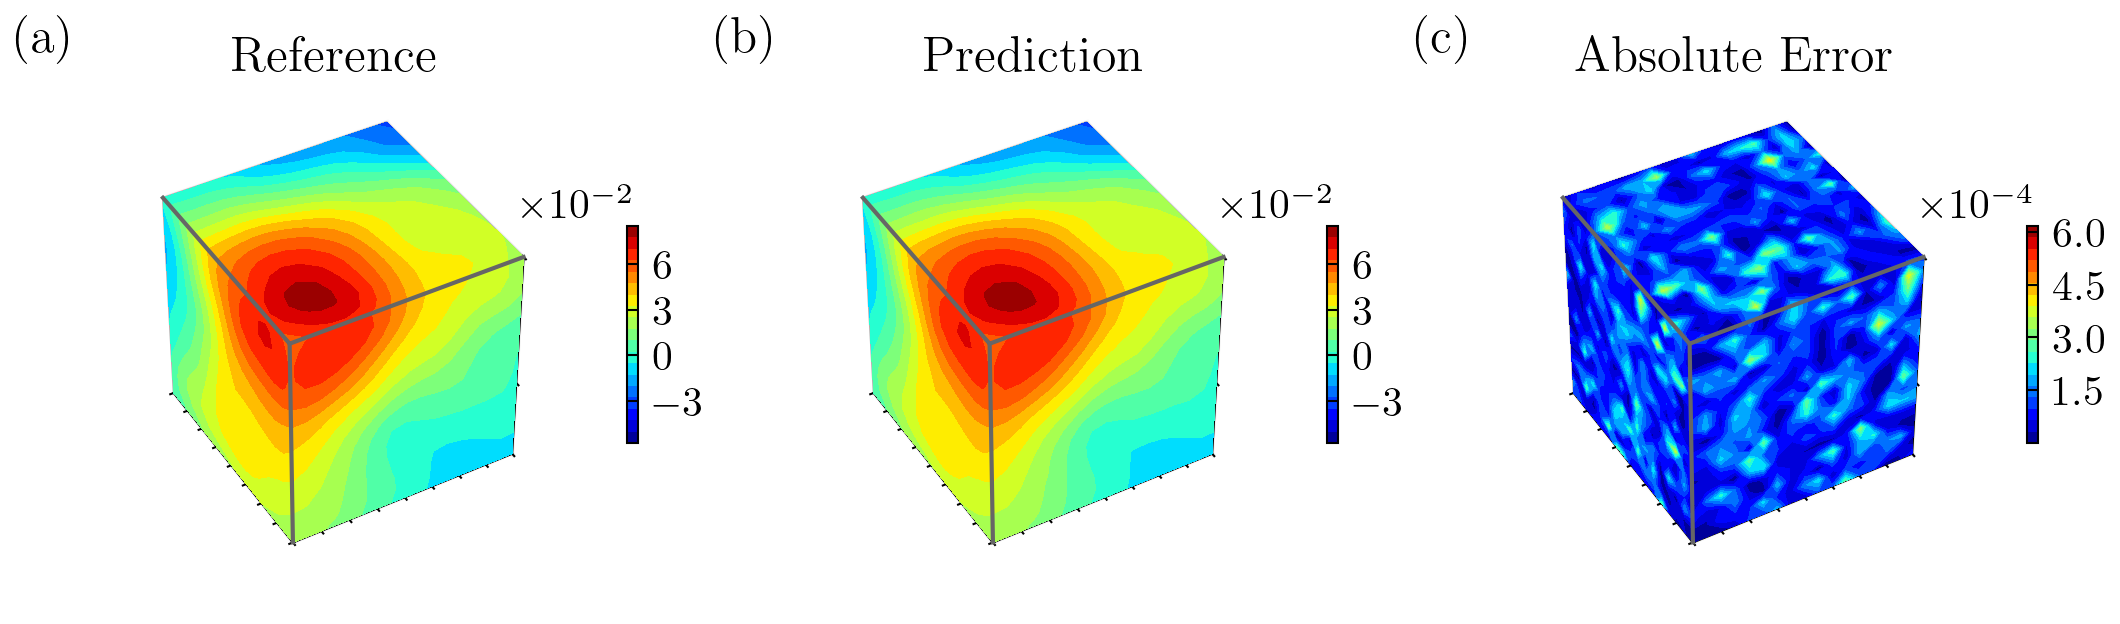

In [4]:
vis_3D_result(task="log3D", idx=10, outnm='log3D.pdf')

estimate cos(r) kernel, k=2
task : cos3D
u relative L2 : 3.6096e-03
task : cos3D
G relative L2 : 1.7454e-02


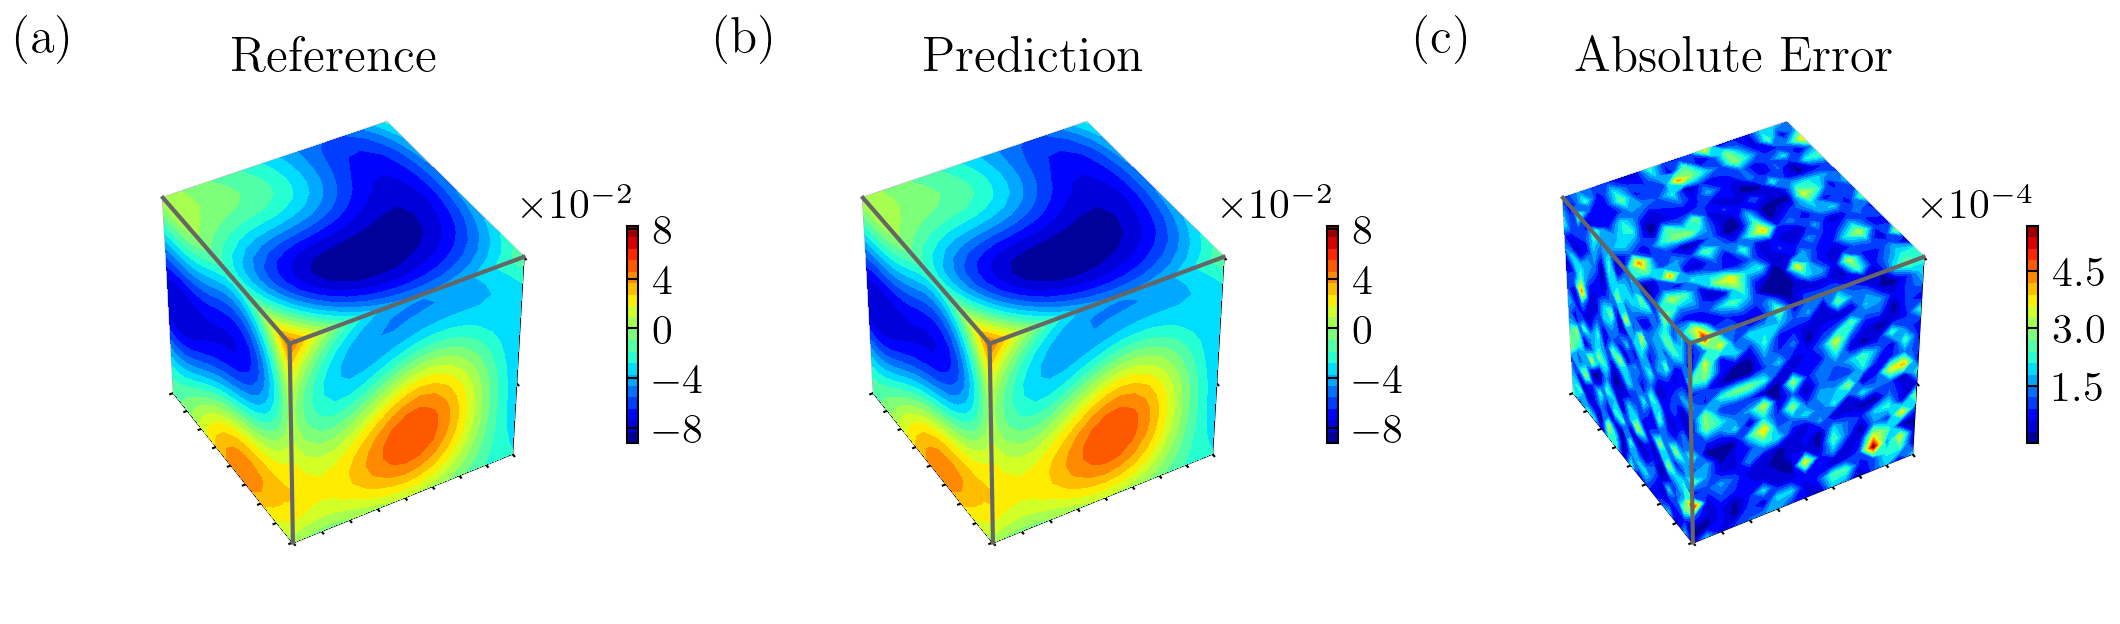

In [5]:
vis_3D_result(task="cos3D", idx=0, outnm='cos3D.pdf')

estimate log(r)*cos(kr) kernel, k=2
task : logcos3D
u relative L2 : 1.0423e-02
task : logcos3D
G relative L2 : 5.0024e-02


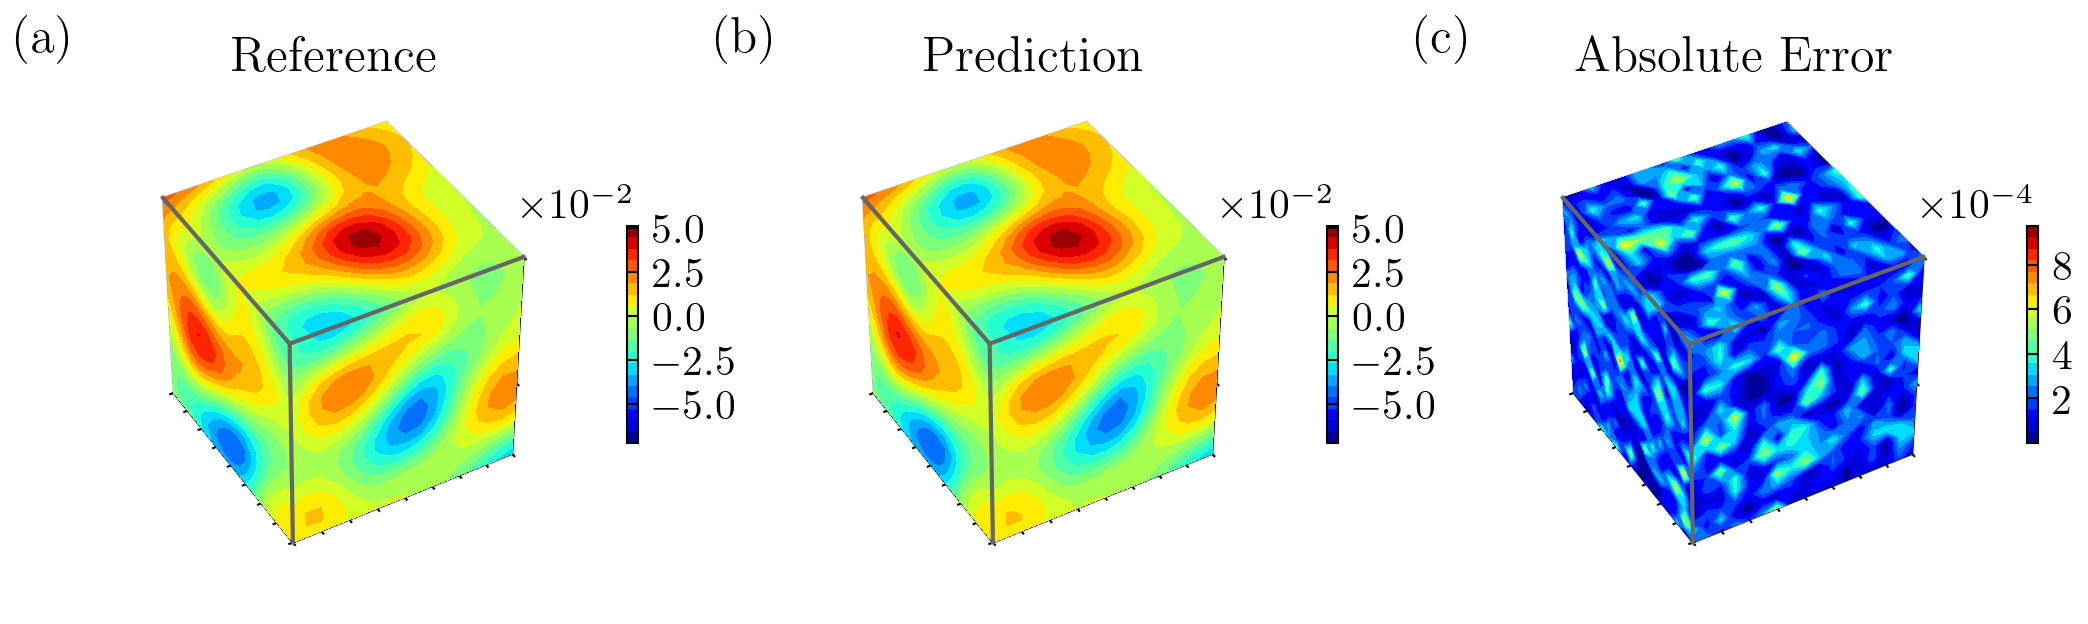

In [6]:
vis_3D_result(task="logcos3D", idx=0, outnm='logcos3D.pdf')

estimate log(r) kernel


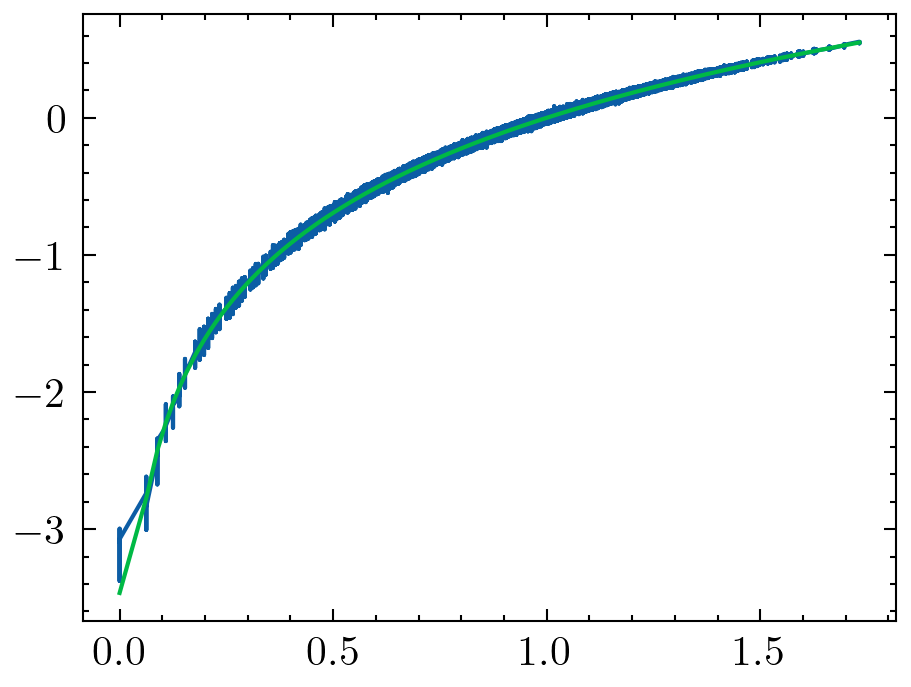

In [7]:
from utils import load_log3d_kernel_dataset
fTrain, fTest, uTrain, uTest, X, Gref = load_log3d_kernel_dataset(
    data_root='../data', nTrain=3000, nTest=1000)
Gpred = np.load("../results/log3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)

Gref = Gref.reshape(-1)
a = (X[:,[0]] - X[:,[3]])**2
b = (X[:,[1]] - X[:,[4]])**2
c = (X[:,[2]] - X[:,[5]])**2
r = ((a + b + c)**0.5).reshape(-1)

Gpred = Gpred.reshape(-1)
idx = np.argsort(r)

plt.plot(r[idx], Gpred[idx])
plt.plot(r[idx], Gref[idx])

estimate log(r)*cos(kr) kernel, k=2


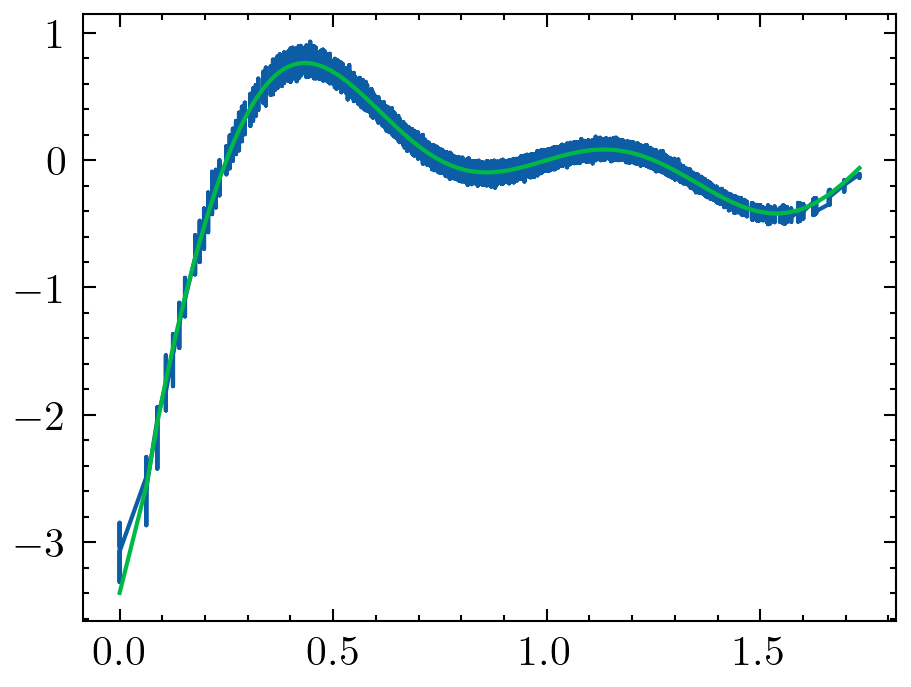

In [8]:
from utils import load_logcos3d_kernel_dataset
fTrain, fTest, uTrain, uTest, X, Gref = load_logcos3d_kernel_dataset(
    data_root='../data', nTrain=3000, nTest=1000)
Gpred = np.load("../results/logcos3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)

Gref = Gref.reshape(-1)
a = (X[:,[0]] - X[:,[3]])**2
b = (X[:,[1]] - X[:,[4]])**2
c = (X[:,[2]] - X[:,[5]])**2
r = ((a + b + c)**0.5).reshape(-1)

Gpred = Gpred.reshape(-1)
idx = np.argsort(r)

plt.plot(r[idx], Gpred[idx])
plt.plot(r[idx], Gref[idx])

In [9]:
nTrain = 3000
nTest = 1000

In [12]:
def vis_ogapw_3D_dynamics(outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,3, wspace=.2).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()
    ax3 = subfigs[2].subplots()
    # ax4 = subfigs[3].subplots()

    def load_data(task):
        print(task)
        if task == 'cos':
            fTrain, fTest, uTrain, uTest, X, Gref = load_cos3d_kernel_dataset(
                '../data', nTrain, nTest)
        elif task == 'log':
            fTrain, fTest, uTrain, uTest, X, Gref = load_log3d_kernel_dataset(
                '../data', nTrain, nTest)
        elif task == 'logcos':
            fTrain, fTest, uTrain, uTest, X, Gref = load_logcos3d_kernel_dataset(
                '../data', nTrain, nTest)
                
        url2s = []
        Grl2s = []
        ns = np.array([8, 16, 32, 64, 128, 256, 513])
        for n in ns:
            if task == 'cos':
                upredpath = f'../results/cos3D/ogapw-{n}-3000-relu/upred.npy'
                Gogapath = f'../results/cos3D/ogapw-{n}-3000-relu/Goga.npy'
            elif task == 'log':
                upredpath = f'../results/log3D/ogapw-{n}-3000-relu/upred.npy'
                Gogapath = f'../results/log3D/ogapw-{n}-3000-relu/Goga.npy'
            elif task == 'logcos':
                upredpath = f'../results/logcos3D/ogapw-{n}-3000-relu/upred.npy'
                Gogapath = f'../results/logcos3D/ogapw-{n}-3000-relu/Goga.npy'

            upred = np.load(upredpath, allow_pickle=True)
            Gpred = np.load(Gogapath, allow_pickle=True)
            # print(upred.shape)
            url2 = relative_err(upred, uTest)
            Grl2 = relative_err(Gpred, Gref)

            url2s.append(url2)
            Grl2s.append(Grl2)
            print("n : {:} rl2 : {:.4e}".format(n, Grl2))
        
        return ns, np.array(url2s), np.array(Grl2s)
    
    ns, cos3D_ulog, cos3D_Glog = load_data('cos')
    ns, log3D_ulog, log3D_Glog = load_data('log')
    ns, logcos3D_ulog, logcos3D_Glog = load_data('logcos')

    #####################
    # On = np.exp(-0.02*ns) #** (-1.25)
    On = ns ** (-1.00)
    ax1.plot(ns, cos3D_ulog, '-.r', label='$\epsilon_u$')
    ax1.plot(ns, cos3D_Glog, '.-r', label='$\epsilon_G$')
    ax1.plot(ns, 8*On, '--k', label="$O(n^{-1.0})$")
    ax1.set_ylim([1e-3, 1])
    ax1.set_title('$\cos(2\pi |\mathbf{x} - \mathbf{y}| )$')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Neurons")
    ax1.set_ylabel("Relative $L_2$ error")
    ax1.legend(loc='lower left', prop={'size': 9})
    label_a = Text(-0.15, 0.95, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)

    On = ns ** (-0.6)
    ax2.plot(ns, log3D_ulog, '-.r', label='$\epsilon_u$')
    ax2.plot(ns, log3D_Glog, '.-r', label='$\epsilon_G$')
    ax2.plot(ns, 0.8*On, '--k', label="$O(n^{-0.6})$")
    ax2.set_ylim([1e-3, 1])
    ax2.set_title('$\log( |\mathbf{x} - \mathbf{y}| )$')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Number of Neurons")
    ax2.set_ylabel("Relative $L_2$ error")
    ax2.legend(loc='lower left', prop={'size': 9})
    label_b = Text(-0.15, 0.95, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)
    
    On = ns ** (-0.8)
    ax3.plot(ns, logcos3D_ulog, '-.r', label='$\epsilon_u$')
    ax3.plot(ns, logcos3D_Glog, '.-r', label='$\epsilon_G$')
    ax3.plot(ns, 8*On, '--k', label="$O(n^{-0.8})$")
    ax3.set_ylim([1e-3, 1])
    ax3.set_title('$\log( |\mathbf{x} - \mathbf{y}| ) \cos(2\pi |\mathbf{x} - \mathbf{y}| )$')
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    ax3.set_xlabel("Number of Neurons")
    ax3.set_ylabel("Relative $L_2$ error")
    ax3.legend(loc='lower left', prop={'size': 9})
    label_c = Text(-0.15, 0.95, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
    subfigs[2].add_artist(label_c)

    plt.savefig(outnm)

cos
estimate cos(r) kernel, k=2
n : 8 rl2 : 5.5382e-01
n : 16 rl2 : 3.8196e-01
n : 32 rl2 : 2.2729e-01
n : 64 rl2 : 1.2176e-01
n : 128 rl2 : 6.2991e-02
n : 256 rl2 : 3.2850e-02
n : 513 rl2 : 1.7454e-02
log
estimate log(r) kernel
n : 8 rl2 : 2.2931e-01
n : 16 rl2 : 1.5217e-01
n : 32 rl2 : 1.0174e-01
n : 64 rl2 : 6.6771e-02
n : 128 rl2 : 4.4405e-02
n : 256 rl2 : 2.9808e-02
n : 513 rl2 : 2.0118e-02
logcos
estimate log(r)*cos(kr) kernel, k=2
n : 8 rl2 : 7.5057e-01
n : 16 rl2 : 6.1486e-01
n : 32 rl2 : 4.3062e-01
n : 64 rl2 : 2.6288e-01
n : 128 rl2 : 1.4995e-01
n : 256 rl2 : 8.5830e-02
n : 513 rl2 : 5.0024e-02


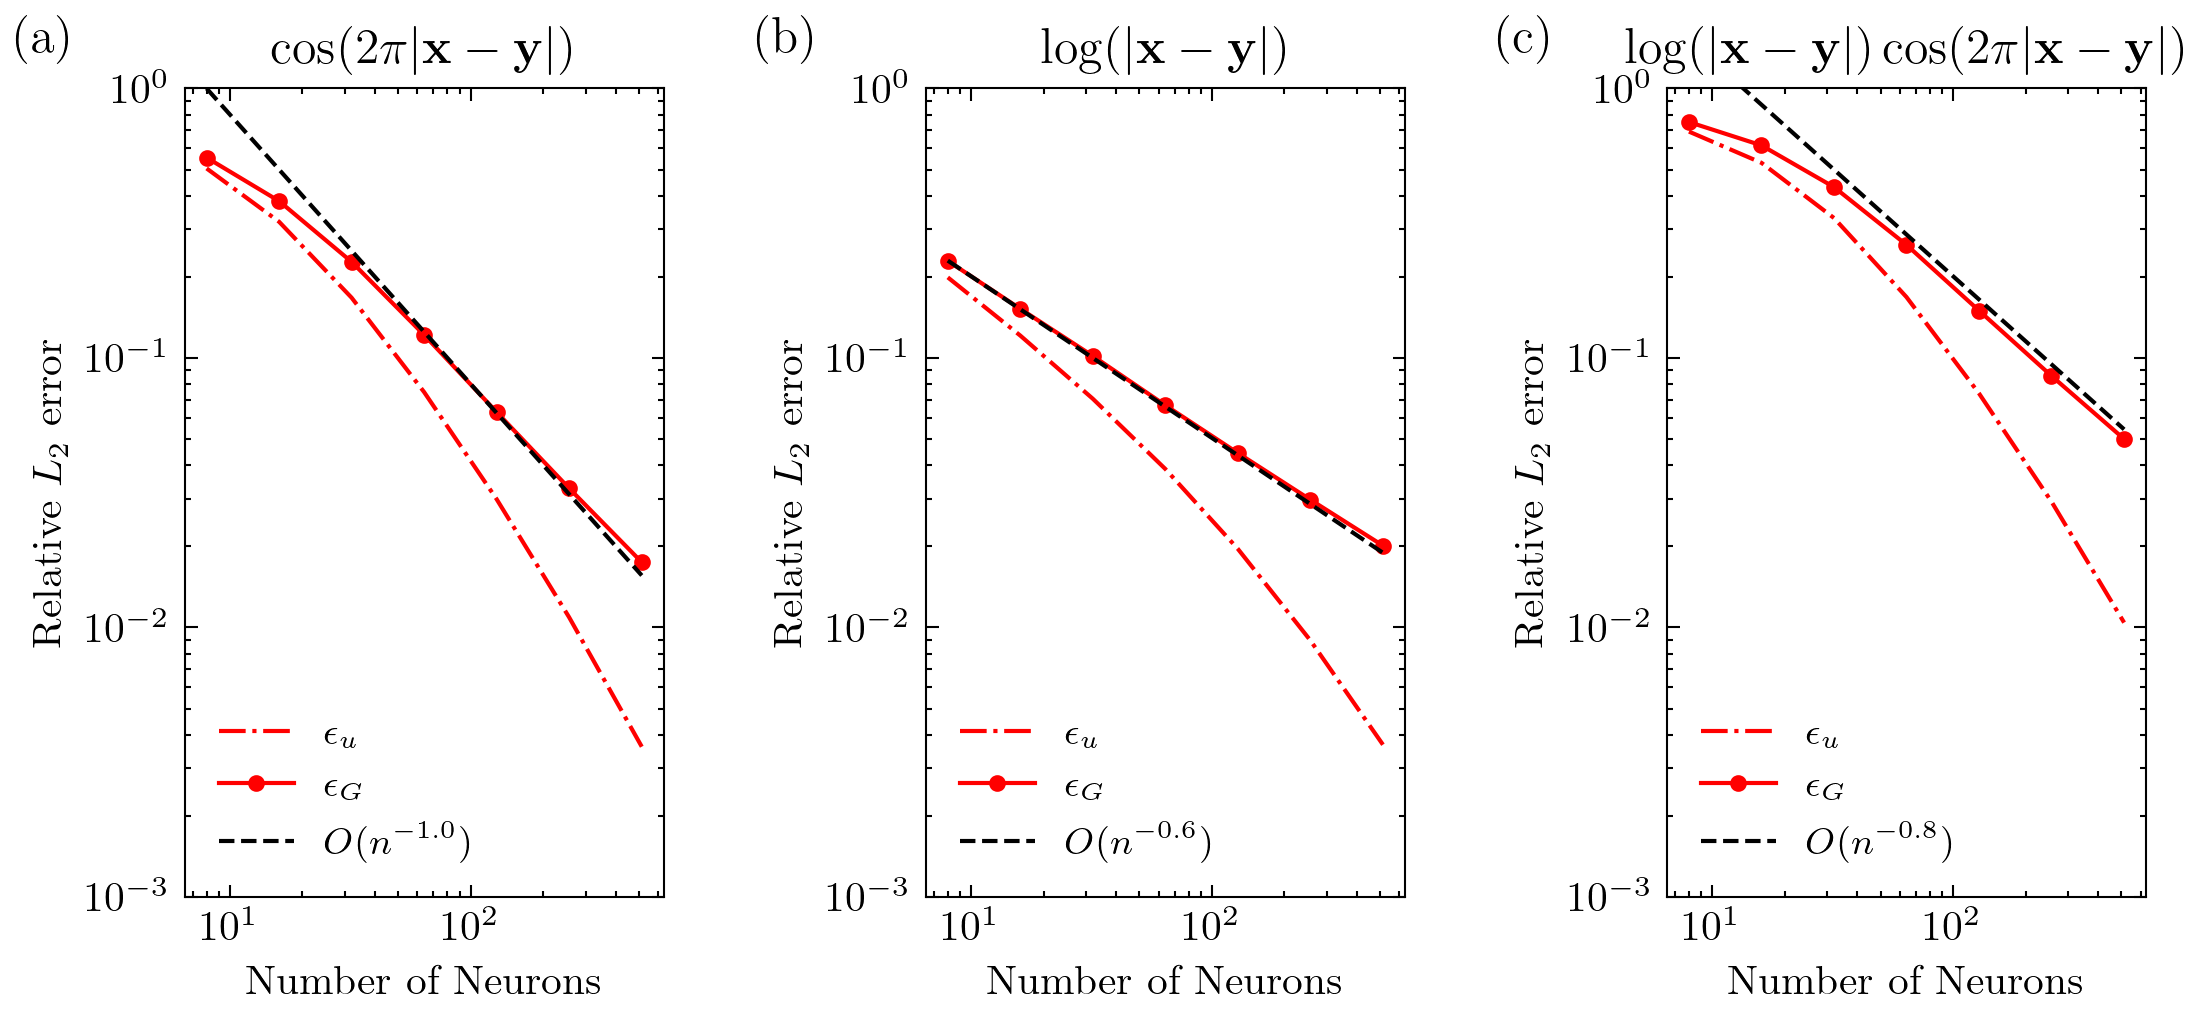

In [13]:
vis_ogapw_3D_dynamics('./ogapw_converge3D.pdf')

In [17]:
def latexlog_compare():

    fTrain, fTest, uTrain, uTest, X, Gref = load_cos3d_kernel_dataset(
        '../data', nTrain, nTest)
    upredpath = f'../results/cos3D/ogapw-513-3000-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_cos = relative_err(upred, uTest)

    fTrain, fTest, uTrain, uTest, X, Gref = load_log3d_kernel_dataset(
        '../data', nTrain, nTest)
    upredpath = f'../results/log3D/ogapw-513-3000-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_log = relative_err(upred, uTest)
    
    fTrain, fTest, uTrain, uTest, X, Gref = load_logcos3d_kernel_dataset(
        '../data', nTrain, nTest)
    upredpath = f'../results/logcos3D/ogapw-513-3000-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_logcos = relative_err(upred, uTest)

    fno_cos = np.load(f'../results/cos3D/fno-500-3000/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    fno_log = np.load(f'../results/log3D/fno-500-3000/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    fno_logcos = np.load(f'../results/logcos3D/fno-500-3000/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    
    don_cos = np.min(np.load(f'../results/cos3D/don-50000-3000/log.npy', allow_pickle=True).item()['utest_rl2'])
    don_log = np.min(np.load(f'../results/log3D/don-50000-3000/log.npy', allow_pickle=True).item()['utest_rl2'])
    don_logcos = np.min(np.load(f'../results/logcos3D/don-50000-3000/log.npy', allow_pickle=True).item()['utest_rl2'])
   
    print('OGApw & {:.4e} & {:.4e} & {:.4e} \\\ '.format(ogapw_cos, ogapw_log, ogapw_logcos))
    print('FNO & {:.4e} & {:.4e} & {:.4e} \\\ '.format(fno_cos, fno_log, fno_logcos))
    print('DON & {:.4e} & {:.4e} & {:.4e} \\\ '.format(don_cos, don_log, don_logcos))

In [18]:
latexlog_compare()

estimate cos(r) kernel, k=2
estimate log(r) kernel
estimate log(r)*cos(kr) kernel, k=2
OGApw & 3.6096e-03 & 3.6723e-03 & 1.0423e-02 \\ 
FNO & 2.8899e-02 & 1.9213e-02 & 1.7207e-02 \\ 
DON & 1.8583e-01 & 1.6031e-01 & 2.7959e-01 \\ 
